## Preprocessing the datasets

In this Jupyter Notebook, we will preprocess and cluster the German Credit Risk dataset.
This dataset is obtained from:
- https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29
And largely follows the preprocessing from:
https://www.kaggle.com/kabure/german-credit-data-with-risk

In [1]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Importing the data

df_credit = pd.read_csv("C:\\Users\\Gebruiker\\Documents\\thesiscode\\experimental\datasets\german_credit_data_target\german_credit_data.csv", index_col=0)

df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## Preprocessing dataset

In [3]:
df_credit.info()
# Most missing values in "saving accounts" and "checking account" attributes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 62.5+ KB


Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

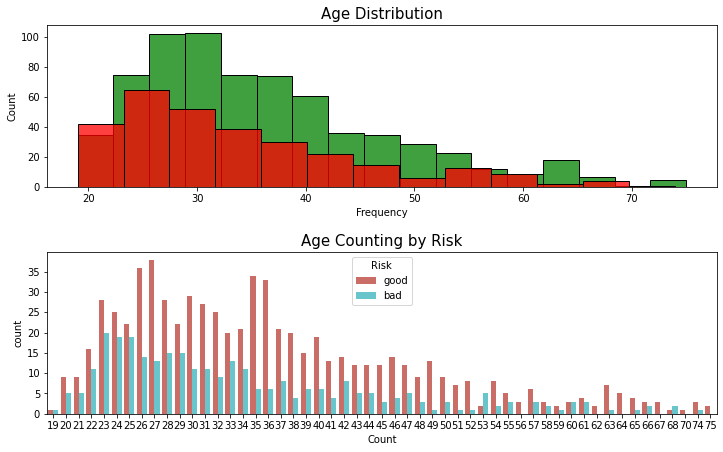

In [14]:
# Matplotlib graphs
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.histplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.histplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribution", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

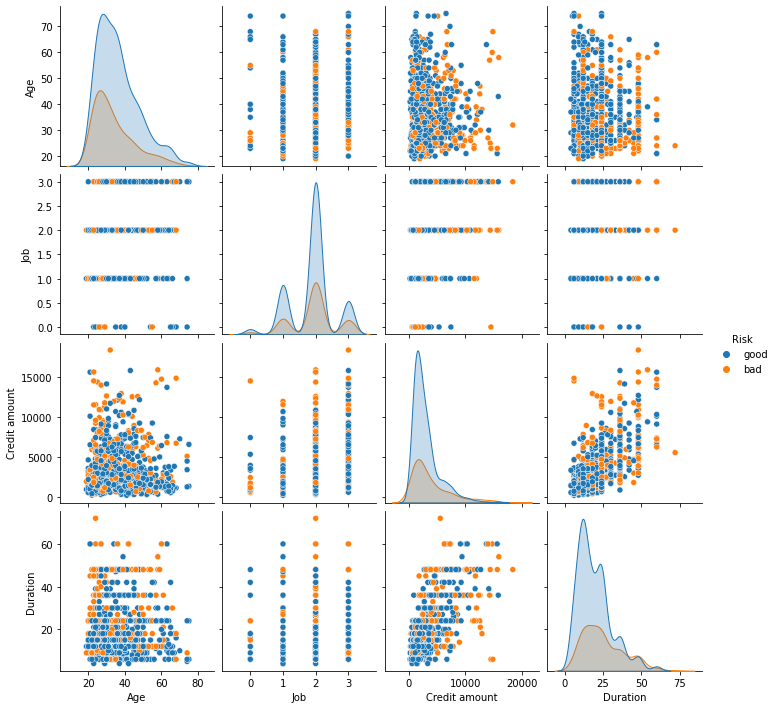

In [18]:
#Plotting with Seaborn
X = df_credit[['Age','Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk']]
sns.pairplot(X, hue="Risk")

<AxesSubplot:>

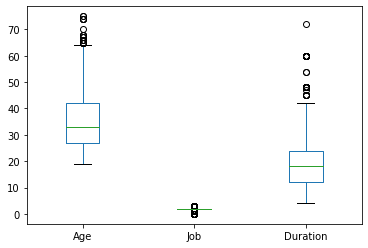

In [21]:
df_credit.boxplot(column=['Age', 'Job', 'Duration'])